In [3]:
import pandas as pd

In [10]:
df = pd.DataFrame({'летит_в_отпуск': [ False, True],
                   'не_начальник': [True, False],
                   'разбудили_утром_рано': [0,1],
                   'проснулся_раньше_меня': [0,1],
                  'летит_но_не_начальник': [0,1]},
                 index = ["Пони_Хаоса", "Звонил_утром"])

In [11]:
df

,летит_в_отпуск,летит_но_не_начальник,не_начальник,проснулся_раньше_меня,разбудили_утром_рано
Пони_Хаоса,False,0,True,0,0
Звонил_утром,True,1,False,1,1


In [12]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Создание датафрейма с dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

In [14]:
features = ['Летит_в_отпуск', 'не_начальник','разбудили_утром_рано','проснулся_раньше_меня','летит_но_не_начальник']

In [15]:
df_train = {}
df_train['Летит_в_отпуск'] = ['летит', 'не_летит', 'летит', 'не_летит',
                         'летит', 'не_летит', 'летит'] 
df_train['не_начальник'] = ['да', 'да', 'нет', 'нет', 'да', 'да', 'да']
df_train['разбудили_утром_рано'] = ['разбудили', 'разбудили_но_позже', 'не_спал_ночью_кодил', 'разбудили', 'разбудили_но_позже',
                                   'не_спал_ночью_кодил', 'проснулся_сел_кодить']
df_train['проснулся_раньше_меня'] = ['не_спит_вообще', 'проснулся_как_я', 'проснулся_позже_меня', 'не_спит_вообще', 'проснулся_позже_меня',
                                  'проснулся_как_я', 'проснулся_раньше_меня']
df_train['летит_но_не_начальник'] = ['да', 'да', 'нет', 'нет', 'да', 'да', 'да']
df_train['Возьмёт_на_работу'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

In [16]:
df_train = create_df(df_train, features)
df_train

,Возьмёт_на_работу,Летит_в_отпуск_летит,Летит_в_отпуск_не_летит,не_начальник_да,не_начальник_нет,разбудили_утром_рано_не_спал_ночью_кодил,разбудили_утром_рано_проснулся_сел_кодить,разбудили_утром_рано_разбудили,разбудили_утром_рано_разбудили_но_позже,проснулся_раньше_меня_не_спит_вообще,проснулся_раньше_меня_проснулся_как_я,проснулся_раньше_меня_проснулся_позже_меня,проснулся_раньше_меня_проснулся_раньше_меня,летит_но_не_начальник_да,летит_но_не_начальник_нет
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
2,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1
3,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
4,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
5,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0
6,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 15 columns):
Возьмёт_на_работу                              7 non-null int64
Летит_в_отпуск_летит                           7 non-null uint8
Летит_в_отпуск_не_летит                        7 non-null uint8
не_начальник_да                                7 non-null uint8
не_начальник_нет                               7 non-null uint8
разбудили_утром_рано_не_спал_ночью_кодил       7 non-null uint8
разбудили_утром_рано_проснулся_сел_кодить      7 non-null uint8
разбудили_утром_рано_разбудили                 7 non-null uint8
разбудили_утром_рано_разбудили_но_позже        7 non-null uint8
проснулся_раньше_меня_не_спит_вообще           7 non-null uint8
проснулся_раньше_меня_проснулся_как_я          7 non-null uint8
проснулся_раньше_меня_проснулся_позже_меня     7 non-null uint8
проснулся_раньше_меня_проснулся_раньше_меня    7 non-null uint8
летит_но_не_начальник_да                       7 non-null uint8
лет

In [18]:
 df_train.to_csv('bad_morning.csv')

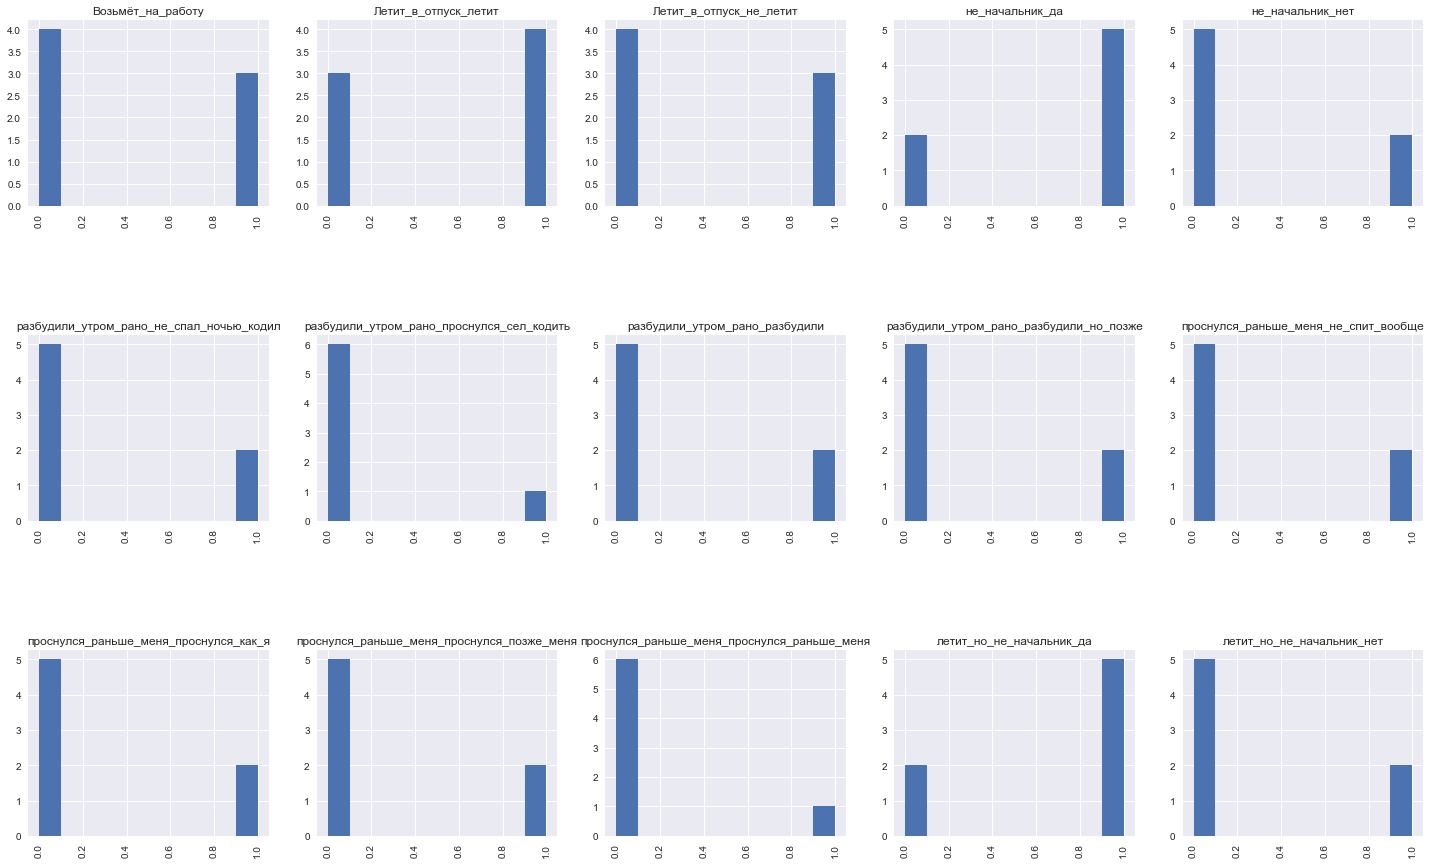

In [22]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(df_train.shape[1]) / cols)
for i, column in enumerate(df_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_train.dtypes[column] == np.object:
        df_train[column].value_counts().plot(kind="bar", axes=ax, color='red')
    else:
        df_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [23]:
X_train=df_train.drop(['Возьмёт_на_работу'], axis=1)
y_train = df_train['Возьмёт_на_работу']

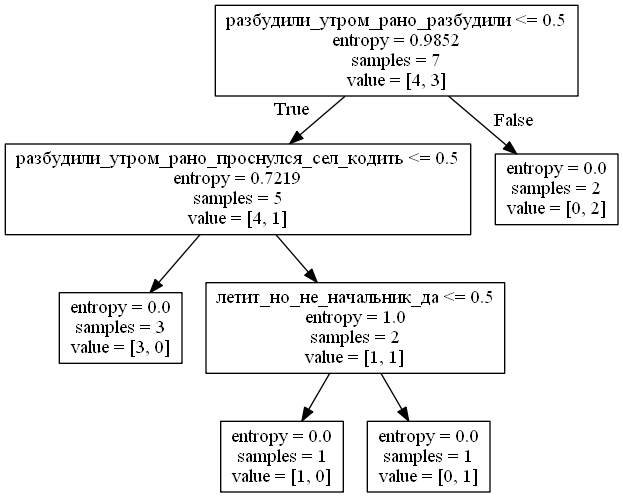

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'J:/HiEnd/StandAloneComplex/Library/bin/graphviz'

from sklearn.tree import DecisionTreeClassifier
train_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
train_tree.fit(X_train, y_train)

from sklearn import tree
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(train_tree, feature_names=df_train.columns.values, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf('df_train_train_tree_bad_morning.pdf') 
graph.write_png('df_train_train_tree_bad_morning.png') 
Image(graph.create_png())